![Workout image](gym.png)

You are a product manager for a **fitness studio** based in Singapore and are interested in understanding the types of digital products you should offer. You already run successful local studios and have an established practice in Singapore. You want to understand the place of digital fitness products in your local market.

You would like to conduct a market analysis in Python to understand how to place your digital product in the regional market and what else is currently out there.

A market analysis will allow you to achieve several things. By identifying strengths of your competitors, you can gauge demand and create unique digital products and services. By identifying gaps in the market, you can find areas to offer a unique value proposition to potential users.

The sky is the limit for how you build on this beyond the project! Some areas to go investigate next are in-person classes, local gyms, local fitness classes, personal instructors, and even online personal instructors. 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', palette='Pastel2')
import os

def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com. 
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(3,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

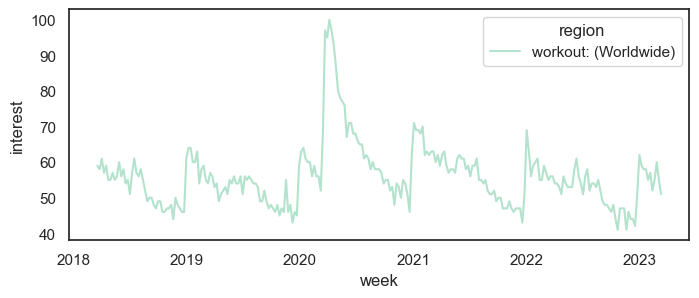

In [9]:
# Load data on global interest in fitness
workout = read_file('data/workout.csv')

In [7]:
# Find average interest by month 
workout_by_month = workout.set_index('week').resample('M').mean()

# Display the results
workout_by_month.head()

,interest
week,
2018-03-31,58.50
2018-04-30,57.40
2018-05-31,57.00
2018-06-30,55.75
2018-07-31,56.40


In [8]:
# Find the month with the highest interest
month_high = workout_by_month[workout_by_month['interest']==workout_by_month['interest'].max()]

# Display the results
month_high

,interest
week,
2020-04-30,94.25


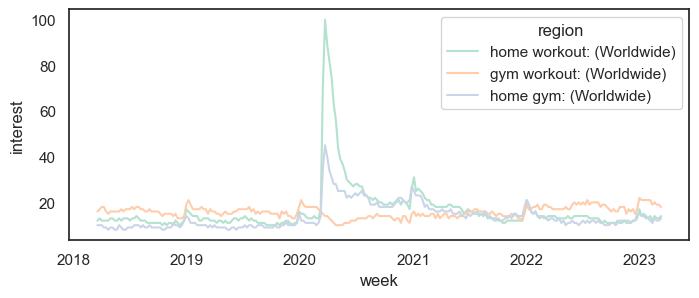

In [11]:
# Load in home_workout_gym_workout_home_gym.csv
home_workout = read_file('data/home_workout_gym_workout_home_gym.csv')

# Create variable of keyword that generated the most interest from 2022 to 2023
current = 'gym workout'

# Create variable of keyword that generated the most interest during 2020
peak_covid = 'home workout'

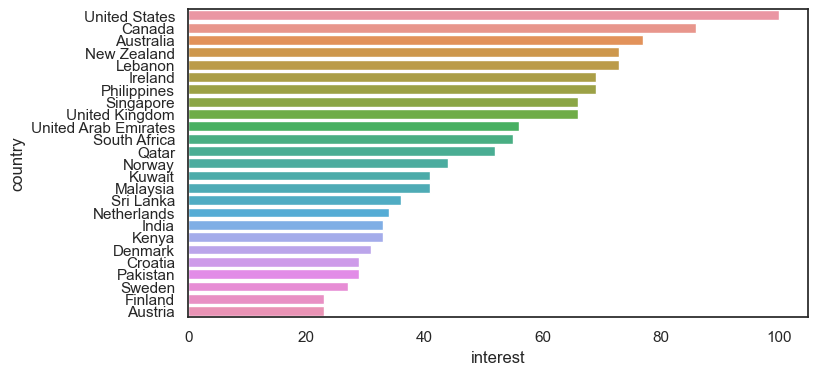

In [12]:
# Read in workout_global.csv
workout_global = read_geo('data/workout_global.csv')

In [14]:
# Subset the DataFrame to return the top 25 countries with the highest interest
top_25_countries = workout_global.head(25)

# Display the DataFrame
top_25_countries.head()

,country,interest
5,United States,100.0
12,Canada,86.0
18,Australia,77.0
22,New Zealand,73.0
23,Lebanon,73.0


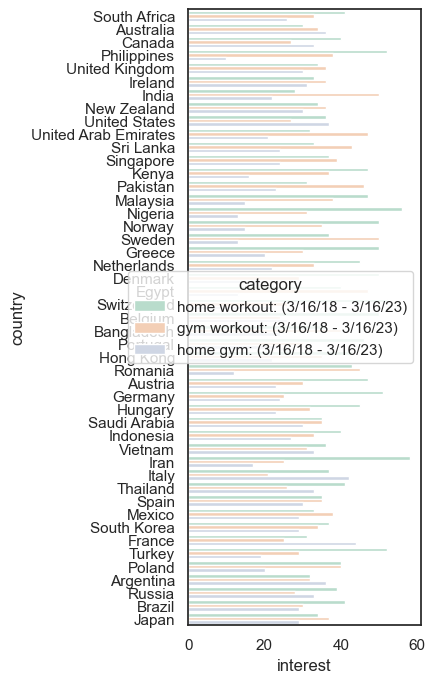

In [15]:
# Read in regional data with multiple keywords
geo_categories = read_geo('data/geo_home_workout_gym_workout_home_gym.csv', multi=True)

In [16]:
# Create list of countries to filter
country_list = ["Philippines", "Singapore", "United Arab Emirates", "Qatar", "Kuwait", "Malaysia", "Sri Lanka", "India", "Pakistan"]

# Subset geo_categories for just Middle East and South Asia countries
MESA = geo_categories[geo_categories['country'].isin(country_list)]

# Display DataFrame
MESA

,country,category,interest
9,Philippines,home workout: (3/16/18 - 3/16/23),52
19,India,gym workout: (3/16/18 - 3/16/23),50
42,Malaysia,home workout: (3/16/18 - 3/16/23),47
28,United Arab Emirates,gym workout: (3/16/18 - 3/16/23),47
40,Pakistan,gym workout: (3/16/18 - 3/16/23),46
31,Sri Lanka,gym workout: (3/16/18 - 3/16/23),43
34,Singapore,gym workout: (3/16/18 - 3/16/23),39
10,Philippines,gym workout: (3/16/18 - 3/16/23),38
43,Malaysia,gym workout: (3/16/18 - 3/16/23),38
33,Singapore,home workout: (3/16/18 - 3/16/23),37


In [17]:
# Split the interest in each country and category
MESA.set_index(['country', 'category']).unstack()

interest  \
category             gym workout: (3/16/18 - 3/16/23)   
country                                                 
India                                              50   
Malaysia                                           38   
Pakistan                                           46   
Philippines                                        38   
Singapore                                          39   
Sri Lanka                                          43   
United Arab Emirates                               47   

                                                    \
category             home gym: (3/16/18 - 3/16/23)   
country                                              
India                                           22   
Malaysia                                        15   
Pakistan                                        23   
Philippines                                     10   
Singapore                                       24   
Sri Lanka                                       24   
United Arab Emirates                            21   

                                                        
category             home workout: (3/16/18 - 3/16/23)  
country                                                 
India                                               28  
Malaysia                                            47  
Pakistan                                            31  
Philippines                                         52  
Singapore                                           37  
Sri Lanka                                           33  
United Arab Emirates                                32

In [18]:
# Create variable for the country with the highest interest in home workouts 
top_home_country = 'The Philippines'

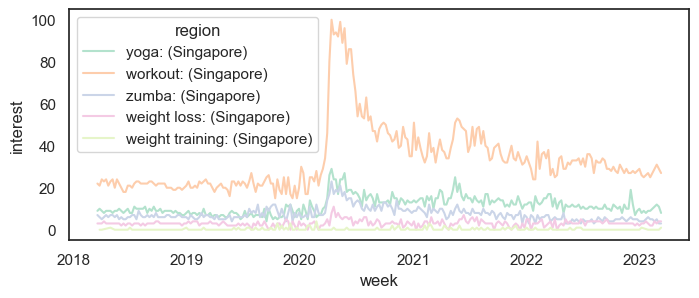

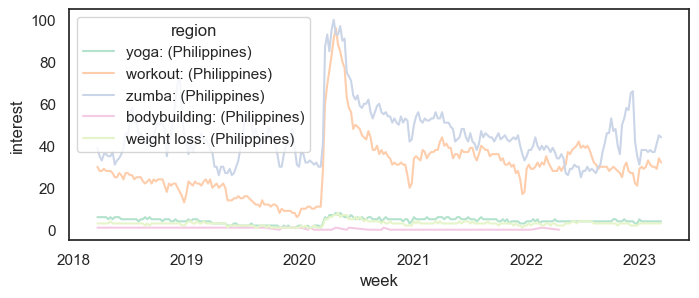

In [19]:
# Load in other csv files
sng = read_file('data/yoga_workout_zumba_bodybuilding_weight_loss_sng.csv')

phl = read_file('data/yoga_workout_zumba_bodybuilding_weight_loss_phl.csv')

In [ ]:
# Create variable for two top media types not including "workout"
pilot_content = ['yoga', 'zumba']